In [8]:
!pip install torchvision==0.16.0
!pip install seaborn
# 安装后点击上方 Restart the kernal

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.huaweicloud.com/repository/pypi/simple

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.huaweicloud.com/repository/pypi/simple

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
# 步骤一：导入相关库
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torchvision.transforms as transforms
from torch_npu.contrib import transfer_to_npu
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [10]:
# 步骤二：加载数据集
# 2.1 设置超参数
EPOCH = 10
BATCH_SIZE = 64
LR = 0.003
DOWNLOAD_CIFAR = False
DEVICE = 'npu'

# 2.2 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 请在此处编写代码：ToTensor 和 Normalize（均值与方差）
])

# 2.3 检查是否需要下载数据集
if not(os.path.exists('./cifar/')) or not os.listdir('./cifar/'):
    DOWNLOAD_CIFAR = True

# 2.4 加载训练集和测试集
train_data = torchvision.datasets.CIFAR10(
    root='./cifar/',
    train=True,
    transform=transform,
    download=DOWNLOAD_CIFAR
)
test_data = torchvision.datasets.CIFAR10(
    root='./cifar/',
    train=False,
    transform=transform,
    download=DOWNLOAD_CIFAR
)

# 2.5 封装数据加载器
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)
test_loader = Data.DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

In [11]:
# 步骤三：CNN模型设计
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
             # 请在此处编写代码：Conv2d + BatchNorm2d + ReLU + MaxPool2d
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
          # 请在此处编写代码：Flatten + Linear + ReLU + Dropout + Linear
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
          # 请在此处编写代码
        x = self.conv(x)
        x = self.fc(x)
        return x

# 3.2 实例化模型并迁移到设备
cnn = CNN().to(DEVICE)  # 请在此处编写代码
print(cnn)

[W compiler_depend.ts:623] Warning: expandable_segments currently defaults to false. You can enable this feature by `export PYTORCH_NPU_ALLOC_CONF = expandable_segments:True`. (function operator())


CNN(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=F

In [12]:
# 步骤四：设置损失函数与优化器
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  # 请在此处编写代码：Adam优化器
criterion = nn.CrossEntropyLoss()  # 请在此处编写代码：交叉熵损失

In [13]:
# 步骤五：训练模型
train_losses = []
test_accuracies = []

# 5.1 定义训练函数
def train(epoch):
    ...  # 请在此处编写代码：切换到训练模式（model.train()）
    epoch_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch+1}")):
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)  # 请在此处编写代码：将 inputs 和 targets 迁移到设备（to(DEVICE)）

        optimizer.zero_grad()  # 请在此处编写代码：清除梯度（optimizer.zero_grad）
        outputs = cnn(inputs)  # 请在此处编写代码：前向传播（model(inputs)）
        loss = criterion(outputs, targets)  # 请在此处编写代码：计算损失（criterion(outputs, targets)）
        loss.backward()  # 请在此处编写代码：反向传播（loss.backward）
        optimizer.step()  # 请在此处编写代码：参数更新（optimizer.step）

        epoch_loss += loss.item()  # 请在此处编写代码：累计损失（epoch_loss += loss.item()）

        # 可选：每 N 批次打印中间 loss
        if batch_idx % 100 == 0:
            print(f'Batch {batch_idx}/{len(train_loader)} Loss: {loss.item():.4f}')  # 请在此处编写代码：打印当前 batch 的平均 loss

    avg_epoch_loss = epoch_loss / len(train_loader)  # 请在此处编写代码：计算 epoch 平均 loss
    train_losses.append(avg_epoch_loss)
    print(f"Epoch [{epoch+1}] Average Train Loss: {avg_epoch_loss:.4f}")

# 5.2 定义测试函数（返回 acc，预测标签，真实标签）
def test():
    ...  # 请在此处编写代码：切换模型为评估模式
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():  # 请在此处编写代码：关闭梯度计算（torch.no_grad）
        for inputs, targets in tqdm(test_loader, desc="Testing"):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)  # 请在此处编写代码：数据迁移到DEVICE
            outputs = cnn(inputs)  # 请在此处编写代码：前向传播
            _, predicted = outputs.max(dim=1)  # 请在此处编写代码：获取预测标签（outputs.max(dim=1)）
            total += targets.size(0)  # 请在此处编写代码：更新 total 和 correct 数量
            correct += predicted.eq(targets).sum().item()
            all_preds.append(predicted.cpu())  # 请在此处编写代码：保存预测和真实标签到 all_preds 和 all_labels
            all_labels.append(targets.cpu())

    acc = 100. * correct / total  # 请在此处编写代码：计算准确率（百分比形式）
    pred_y = torch.cat(all_preds)
    true_y = torch.cat(all_labels)
    return acc, pred_y, true_y

# 5.3 开始训练过程
os.makedirs('./output', exist_ok=True)

for epoch in range(EPOCH):
    train(epoch)  # 请在此处编写代码：调用 train 函数
    acc, _, _ = test()  # 请在此处编写代码：调用 test 函数
    test_accuracies.append(acc)  # 请在此处编写代码：保存本轮测试准确率
    print(f"Test Accuracy after Epoch [{epoch+1}]: {acc:.4f}")

Training Epoch 1:   1%|▏         | 10/782 [00:11<10:21,  1.24it/s] 

Batch 0/782 Loss: 2.2777


Training Epoch 1:  14%|█▍        | 110/782 [00:12<00:12, 53.21it/s]

Batch 100/782 Loss: 1.7988


Training Epoch 1:  27%|██▋       | 208/782 [00:14<00:09, 60.57it/s]

Batch 200/782 Loss: 1.6848


Training Epoch 1:  39%|███▉      | 308/782 [00:15<00:07, 62.16it/s]

Batch 300/782 Loss: 1.6715


Training Epoch 1:  52%|█████▏    | 407/782 [00:17<00:05, 65.56it/s]

Batch 400/782 Loss: 1.4772


Training Epoch 1:  65%|██████▍   | 507/782 [00:18<00:04, 65.51it/s]

Batch 500/782 Loss: 1.5631


Training Epoch 1:  77%|███████▋  | 606/782 [00:20<00:02, 62.54it/s]

Batch 600/782 Loss: 1.9639


Training Epoch 1:  90%|█████████ | 706/782 [00:22<00:01, 65.36it/s]

Batch 700/782 Loss: 1.4428


Training Epoch 1: 100%|██████████| 782/782 [00:23<00:00, 33.41it/s]


Epoch [1] Average Train Loss: 1.6450


Testing: 100%|██████████| 157/157 [00:02<00:00, 58.81it/s]


Test Accuracy after Epoch [1]: 47.5100


Training Epoch 2:   1%|          | 8/782 [00:00<00:25, 30.39it/s]

Batch 0/782 Loss: 1.6479


Training Epoch 2:  14%|█▍        | 108/782 [00:01<00:10, 62.56it/s]

Batch 100/782 Loss: 1.2735


Training Epoch 2:  26%|██▋       | 207/782 [00:03<00:09, 62.51it/s]

Batch 200/782 Loss: 1.2942


Training Epoch 2:  39%|███▉      | 307/782 [00:05<00:07, 63.63it/s]

Batch 300/782 Loss: 1.2559


Training Epoch 2:  53%|█████▎    | 412/782 [00:06<00:05, 65.09it/s]

Batch 400/782 Loss: 1.1438


Training Epoch 2:  65%|██████▌   | 510/782 [00:08<00:04, 63.24it/s]

Batch 500/782 Loss: 1.2547


Training Epoch 2:  78%|███████▊  | 611/782 [00:09<00:02, 65.01it/s]

Batch 600/782 Loss: 1.0518


Training Epoch 2:  91%|█████████ | 710/782 [00:11<00:01, 64.63it/s]

Batch 700/782 Loss: 1.2777


Training Epoch 2: 100%|██████████| 782/782 [00:12<00:00, 62.72it/s]


Epoch [2] Average Train Loss: 1.2469


Testing: 100%|██████████| 157/157 [00:02<00:00, 60.07it/s]


Test Accuracy after Epoch [2]: 59.5100


Training Epoch 3:   0%|          | 1/782 [00:00<02:24,  5.41it/s]

Batch 0/782 Loss: 0.9793


Training Epoch 3:  14%|█▍        | 108/782 [00:01<00:10, 65.77it/s]

Batch 100/782 Loss: 1.4052


Training Epoch 3:  27%|██▋       | 213/782 [00:03<00:09, 62.36it/s]

Batch 200/782 Loss: 1.2530


Training Epoch 3:  39%|███▉      | 308/782 [00:04<00:07, 65.88it/s]

Batch 300/782 Loss: 1.0570


Training Epoch 3:  52%|█████▏    | 408/782 [00:06<00:05, 65.60it/s]

Batch 400/782 Loss: 1.0977


Training Epoch 3:  66%|██████▌   | 513/782 [00:08<00:04, 63.63it/s]

Batch 500/782 Loss: 1.0043


Training Epoch 3:  78%|███████▊  | 612/782 [00:09<00:02, 65.51it/s]

Batch 600/782 Loss: 0.7966


Training Epoch 3:  91%|█████████ | 711/782 [00:11<00:01, 65.78it/s]

Batch 700/782 Loss: 0.7763


Training Epoch 3: 100%|██████████| 782/782 [00:12<00:00, 62.90it/s]


Epoch [3] Average Train Loss: 1.0507


Testing: 100%|██████████| 157/157 [00:02<00:00, 59.77it/s]


Test Accuracy after Epoch [3]: 65.5700


Training Epoch 4:   0%|          | 1/782 [00:00<02:23,  5.45it/s]

Batch 0/782 Loss: 0.9618


Training Epoch 4:  14%|█▎        | 107/782 [00:01<00:10, 66.45it/s]

Batch 100/782 Loss: 0.7969


Training Epoch 4:  26%|██▋       | 206/782 [00:03<00:09, 63.92it/s]

Batch 200/782 Loss: 0.9300


Training Epoch 4:  40%|████      | 313/782 [00:05<00:07, 63.36it/s]

Batch 300/782 Loss: 1.0505


Training Epoch 4:  53%|█████▎    | 412/782 [00:06<00:06, 59.82it/s]

Batch 400/782 Loss: 1.0364


Training Epoch 4:  65%|██████▌   | 510/782 [00:08<00:04, 64.32it/s]

Batch 500/782 Loss: 1.0632


Training Epoch 4:  78%|███████▊  | 609/782 [00:09<00:02, 65.12it/s]

Batch 600/782 Loss: 0.9274


Training Epoch 4:  90%|█████████ | 707/782 [00:11<00:01, 64.23it/s]

Batch 700/782 Loss: 1.0289


Training Epoch 4: 100%|██████████| 782/782 [00:12<00:00, 62.30it/s]


Epoch [4] Average Train Loss: 0.9252


Testing: 100%|██████████| 157/157 [00:02<00:00, 56.64it/s]


Test Accuracy after Epoch [4]: 68.2500


Training Epoch 5:   0%|          | 1/782 [00:00<02:33,  5.08it/s]

Batch 0/782 Loss: 0.7736


Training Epoch 5:  14%|█▍        | 109/782 [00:01<00:11, 59.61it/s]

Batch 100/782 Loss: 0.8264


Training Epoch 5:  27%|██▋       | 208/782 [00:03<00:08, 63.89it/s]

Batch 200/782 Loss: 0.8578


Training Epoch 5:  40%|███▉      | 309/782 [00:05<00:07, 64.64it/s]

Batch 300/782 Loss: 0.7977


Training Epoch 5:  52%|█████▏    | 408/782 [00:06<00:05, 64.59it/s]

Batch 400/782 Loss: 0.6626


Training Epoch 5:  65%|██████▍   | 507/782 [00:08<00:04, 63.05it/s]

Batch 500/782 Loss: 0.9494


Training Epoch 5:  78%|███████▊  | 608/782 [00:09<00:02, 65.42it/s]

Batch 600/782 Loss: 0.8836


Training Epoch 5:  91%|█████████ | 708/782 [00:11<00:01, 65.46it/s]

Batch 700/782 Loss: 1.0266


Training Epoch 5: 100%|██████████| 782/782 [00:12<00:00, 62.39it/s]


Epoch [5] Average Train Loss: 0.8302


Testing: 100%|██████████| 157/157 [00:02<00:00, 58.68it/s]


Test Accuracy after Epoch [5]: 70.2800


Training Epoch 6:   0%|          | 1/782 [00:00<02:31,  5.17it/s]

Batch 0/782 Loss: 0.7409


Training Epoch 6:  14%|█▍        | 110/782 [00:01<00:10, 62.16it/s]

Batch 100/782 Loss: 0.9577


Training Epoch 6:  27%|██▋       | 209/782 [00:03<00:08, 64.44it/s]

Batch 200/782 Loss: 0.6022


Training Epoch 6:  39%|███▉      | 308/782 [00:05<00:07, 62.73it/s]

Batch 300/782 Loss: 0.6731


Training Epoch 6:  52%|█████▏    | 407/782 [00:06<00:05, 65.94it/s]

Batch 400/782 Loss: 0.9920


Training Epoch 6:  65%|██████▍   | 508/782 [00:08<00:04, 63.74it/s]

Batch 500/782 Loss: 0.7688


Training Epoch 6:  78%|███████▊  | 613/782 [00:09<00:02, 65.54it/s]

Batch 600/782 Loss: 0.8190


Training Epoch 6:  91%|█████████ | 712/782 [00:11<00:01, 65.31it/s]

Batch 700/782 Loss: 0.6185


Training Epoch 6: 100%|██████████| 782/782 [00:12<00:00, 62.51it/s]


Epoch [6] Average Train Loss: 0.7605


Testing: 100%|██████████| 157/157 [00:02<00:00, 56.66it/s]


Test Accuracy after Epoch [6]: 71.0600


Training Epoch 7:   1%|          | 7/782 [00:00<00:31, 24.91it/s]

Batch 0/782 Loss: 0.6902


Training Epoch 7:  14%|█▍        | 112/782 [00:01<00:09, 67.07it/s]

Batch 100/782 Loss: 0.6352


Training Epoch 7:  27%|██▋       | 212/782 [00:03<00:08, 64.89it/s]

Batch 200/782 Loss: 0.5711


Training Epoch 7:  40%|███▉      | 310/782 [00:04<00:07, 64.50it/s]

Batch 300/782 Loss: 0.6879


Training Epoch 7:  52%|█████▏    | 409/782 [00:06<00:05, 63.44it/s]

Batch 400/782 Loss: 0.8258


Training Epoch 7:  65%|██████▌   | 510/782 [00:08<00:04, 66.52it/s]

Batch 500/782 Loss: 0.8223


Training Epoch 7:  78%|███████▊  | 611/782 [00:09<00:02, 65.73it/s]

Batch 600/782 Loss: 0.6410


Training Epoch 7:  91%|█████████ | 708/782 [00:11<00:01, 66.35it/s]

Batch 700/782 Loss: 0.6920


Training Epoch 7: 100%|██████████| 782/782 [00:12<00:00, 63.23it/s]


Epoch [7] Average Train Loss: 0.6986


Testing: 100%|██████████| 157/157 [00:02<00:00, 59.15it/s]


Test Accuracy after Epoch [7]: 71.4800


Training Epoch 8:   0%|          | 1/782 [00:00<02:31,  5.15it/s]

Batch 0/782 Loss: 0.5891


Training Epoch 8:  14%|█▍        | 109/782 [00:01<00:10, 64.54it/s]

Batch 100/782 Loss: 0.7514


Training Epoch 8:  27%|██▋       | 214/782 [00:03<00:08, 64.24it/s]

Batch 200/782 Loss: 0.5532


Training Epoch 8:  40%|████      | 313/782 [00:05<00:07, 64.72it/s]

Batch 300/782 Loss: 0.4442


Training Epoch 8:  53%|█████▎    | 413/782 [00:06<00:05, 66.47it/s]

Batch 400/782 Loss: 0.7277


Training Epoch 8:  65%|██████▍   | 507/782 [00:08<00:04, 63.78it/s]

Batch 500/782 Loss: 0.5708


Training Epoch 8:  78%|███████▊  | 607/782 [00:09<00:02, 65.96it/s]

Batch 600/782 Loss: 0.9084


Training Epoch 8:  91%|█████████ | 708/782 [00:11<00:01, 64.83it/s]

Batch 700/782 Loss: 0.6593


Training Epoch 8: 100%|██████████| 782/782 [00:12<00:00, 62.78it/s]


Epoch [8] Average Train Loss: 0.6408


Testing: 100%|██████████| 157/157 [00:02<00:00, 57.45it/s]


Test Accuracy after Epoch [8]: 70.7000


Training Epoch 9:   1%|          | 7/782 [00:00<00:31, 24.99it/s]

Batch 0/782 Loss: 0.6713


Training Epoch 9:  14%|█▍        | 113/782 [00:01<00:10, 65.06it/s]

Batch 100/782 Loss: 0.4463


Training Epoch 9:  27%|██▋       | 211/782 [00:03<00:08, 64.17it/s]

Batch 200/782 Loss: 0.6421


Training Epoch 9:  40%|████      | 313/782 [00:05<00:07, 65.27it/s]

Batch 300/782 Loss: 0.5920


Training Epoch 9:  53%|█████▎    | 411/782 [00:06<00:05, 64.52it/s]

Batch 400/782 Loss: 0.7389


Training Epoch 9:  65%|██████▌   | 510/782 [00:08<00:04, 65.76it/s]

Batch 500/782 Loss: 0.5185


Training Epoch 9:  78%|███████▊  | 610/782 [00:09<00:02, 66.32it/s]

Batch 600/782 Loss: 0.6732


Training Epoch 9:  91%|█████████ | 710/782 [00:11<00:01, 63.41it/s]

Batch 700/782 Loss: 0.5272


Training Epoch 9: 100%|██████████| 782/782 [00:12<00:00, 63.33it/s]


Epoch [9] Average Train Loss: 0.6003


Testing: 100%|██████████| 157/157 [00:02<00:00, 59.74it/s]


Test Accuracy after Epoch [9]: 73.2400


Training Epoch 10:   1%|          | 8/782 [00:00<00:26, 29.21it/s]

Batch 0/782 Loss: 0.6595


Training Epoch 10:  14%|█▍        | 111/782 [00:01<00:10, 66.01it/s]

Batch 100/782 Loss: 0.5501


Training Epoch 10:  27%|██▋       | 210/782 [00:03<00:09, 62.52it/s]

Batch 200/782 Loss: 0.5230


Training Epoch 10:  40%|███▉      | 309/782 [00:04<00:07, 64.13it/s]

Batch 300/782 Loss: 0.5882


Training Epoch 10:  52%|█████▏    | 408/782 [00:06<00:05, 65.37it/s]

Batch 400/782 Loss: 0.5465


Training Epoch 10:  66%|██████▌   | 513/782 [00:08<00:04, 64.25it/s]

Batch 500/782 Loss: 0.4762


Training Epoch 10:  78%|███████▊  | 611/782 [00:09<00:02, 63.34it/s]

Batch 600/782 Loss: 0.7149


Training Epoch 10:  91%|█████████ | 710/782 [00:11<00:01, 63.19it/s]

Batch 700/782 Loss: 0.7200


Training Epoch 10: 100%|██████████| 782/782 [00:12<00:00, 62.75it/s]


Epoch [10] Average Train Loss: 0.5573


Testing: 100%|██████████| 157/157 [00:02<00:00, 56.22it/s]

Test Accuracy after Epoch [10]: 73.7300


Testing: 100%|██████████| 157/157 [00:02<00:00, 56.04it/s]



Final Test Accuracy: 73.91%


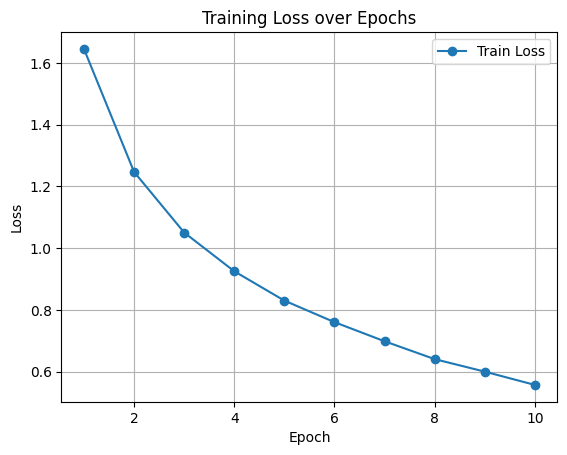

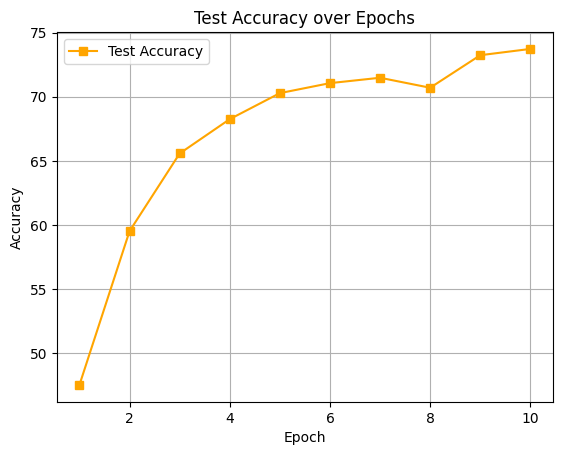

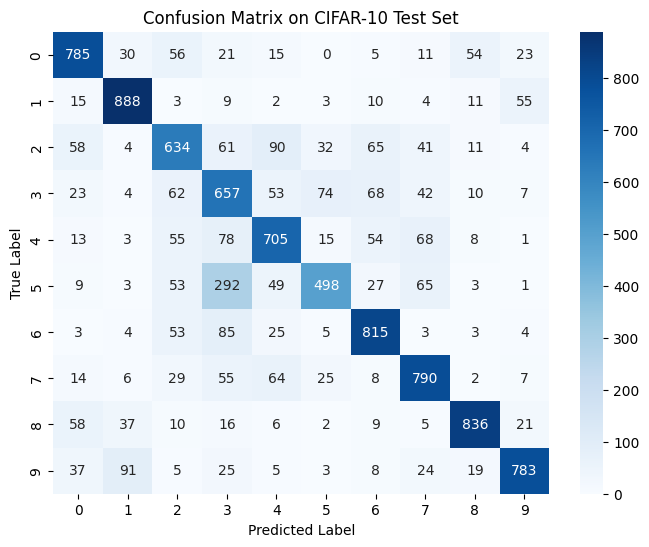

Prediction: [3 8 8 0 6 6 7 6 3 1]
Actual:     [3 8 8 0 6 6 1 6 3 1]


In [14]:
# 步骤六：模型评估
# 6.1 最后一次测试
final_acc, pred_y, true_y = test()
print(f"\nFinal Test Accuracy: {final_acc:.2f}%")

# 6.2 绘制训练loss变化曲线
plt.figure()
plt.plot(range(1, EPOCH+1), train_losses, marker='o', label='Train Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid(True)
plt.savefig('./output/train_loss_curve.png')
plt.show()

# 6.3 绘制测试准确率变化曲线
plt.figure()
plt.plot(range(1, EPOCH+1), test_accuracies, marker='s', color='orange', label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.savefig('./output/test_accuracy_curve.png')
plt.show()

# 6.4 绘制混淆矩阵
conf_mat = confusion_matrix(true_y.numpy(), pred_y.numpy())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on CIFAR-10 Test Set")
plt.savefig('./output/confusion_matrix.png')
plt.show()

# 6.5 打印前10个预测结果
print('Prediction:', pred_y[:10].numpy())
print('Actual:    ', true_y[:10].numpy())

In [16]:
# 步骤七：保存模型与结果
# 请在此处编写代码：保存模型
torch.save(cnn.state_dict(), './output/cnn_cifar10.pth')

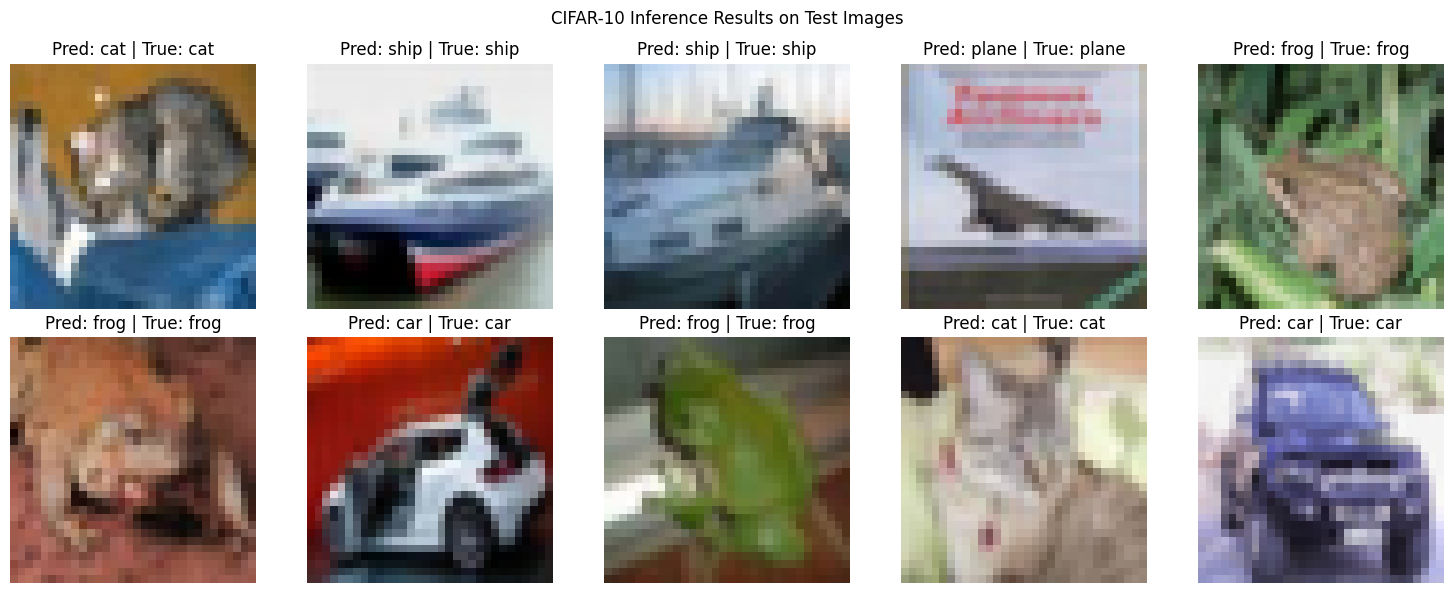

In [17]:
# 步骤八：推理结果可视化
# 8.1 CIFAR10 类别标签
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# 8.2 可视化推理函数
def visualize_cifar10_predictions(model, test_loader, device='cpu', num_images=10):
    """
    可视化模型在 CIFAR-10 测试集上的部分预测结果（RGB 彩色图）
    """
    model.eval()  # 请在此处编写代码：将模型设置为 eval 模式
    shown = 0
    plt.figure(figsize=(15, 6))

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # 请在此处编写代码：将 inputs 和 targets 迁移到指定设备
            outputs = model(inputs)  # 请在此处编写代码：前向传播获得模型输出
            _, predicted = torch.max(outputs,1)  # 请在此处编写代码：获取预测结果

            for i in range(inputs.size(0)):
                if shown >= num_images:
                    break

                img = inputs[i].cpu().numpy().transpose(1, 2, 0)  # 请在此处编写代码：提取第 i 张图像并反归一化，还原为 (32, 32, 3)
                img = img * 0.5 + 0.5  # 反归一化
                true_label = classes[targets[i].item()]  # 请在此处编写代码：获取真实类别名称
                pred_label = classes[predicted[i].item()]  # 请在此处编写代码：获取预测类别名称

                plt.subplot(2, (num_images + 1) // 2, shown + 1)
                plt.imshow(img)
                plt.title(f"Pred: {pred_label} | True: {true_label}")
                plt.axis('off')
                shown += 1

            if shown >= num_images:
                break

    plt.suptitle("CIFAR-10 Inference Results on Test Images")
    plt.tight_layout()
    plt.savefig('./output/cifar10_test_predictions.png')
    plt.show()

# 8.3 执行推理可视化
visualize_cifar10_predictions(cnn, test_loader, device=DEVICE, num_images=10)